In [36]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('DE_edges.csv')

print(df_edges.columns)
# dict={}
# count=0
# for index, row in df_edges.iterrows():
#     if row['from'] not in dict:
#         dict[row['from']]=count
#         count+=1

# print(dict)

# new_edges=pd.DataFrame( df_edges.replace({"from": dict,
#                  "to": dict}))


new_edges = df_edges.sort_values(by=['from'], ascending=True)
new_edges=new_edges.drop(df[new_edges["from"]==new_edges["to"]], inplace=True)
# new_edges = new_edges.astype('int64').dtypes
new_edges= new_edges.dropna()
nodes.reset_index(inplace=True)
print(new_edges.head())
G_new = nx.Graph()
# new_edges.to_csv("edge_2.csv")
for index, row in new_edges.iterrows():
    G_new.add_edges_from([(int(row['from']), int(row['to']))])

node_indices = sorted([node for node in G.nodes()])
numeric_indices = [index for index in range(G.number_of_nodes())]
print((numeric_indices == node_indices))
list1=list(set(numeric_indices) - set(node_indices))
print(list1)

# for index, row in df_nodes.iterrows():
#     G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
# for index, row in df_edges.iterrows():
#     G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
# color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
#              7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
#              13:'#d6dcff', 14:'#d2f5f0'} 

# plt.figure(figsize=(15,15))
# options = {
#     'edge_color': '#000000',
#     'width': 1,
#     'with_labels': True,
#     'font_weight': 'regular',
# }
# colors = [color_map[G.nodes[node]['group']] for node in G]
# sizes = [G.nodes[node]['nodesize']*10 for node in G]

# nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
# ax = plt.gca()
# ax.collections[0].set_edgecolor("#555555") 
# plt.show()

Index(['from', 'to'], dtype='object')
   from    to
0     0  9206
1     0  7787
2     0  2145
3     0  2684
4     0  7275
True
[]


In [37]:
from karateclub import DeepWalk

node_indices = sorted([node for node in G_new.nodes()])
numeric_indices = [index for index in range(G_new.number_of_nodes())]
print((numeric_indices == node_indices))
list1=sorted(list(set(numeric_indices) - set(node_indices)))
print(list1)

model = DeepWalk()
model.fit(G_new)
embedding = model.get_embedding()


True
[]


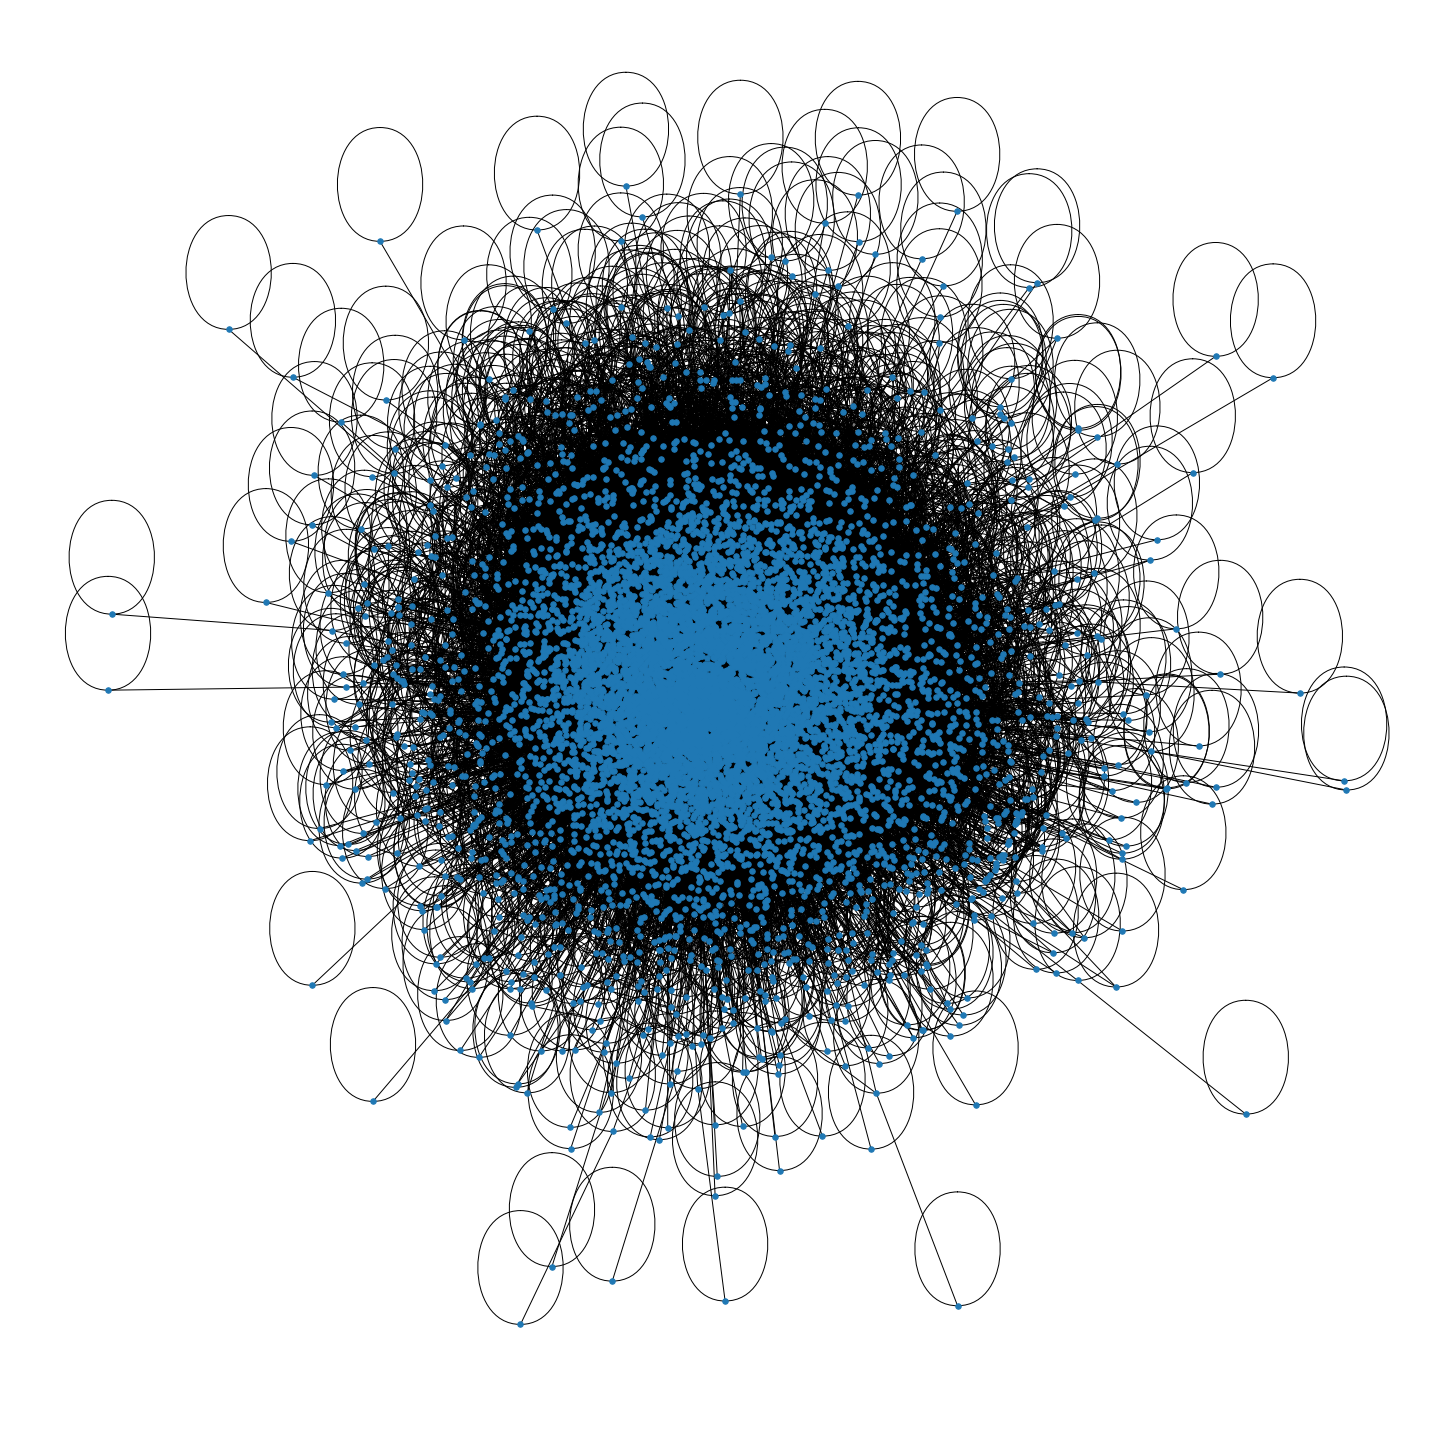

In [43]:
fig = plt.figure(figsize=(20, 20)) 
nx.draw(G_new, node_size=30) 
plt.axis('equal') 
plt.show() 
fig.savefig('waka.svg') 

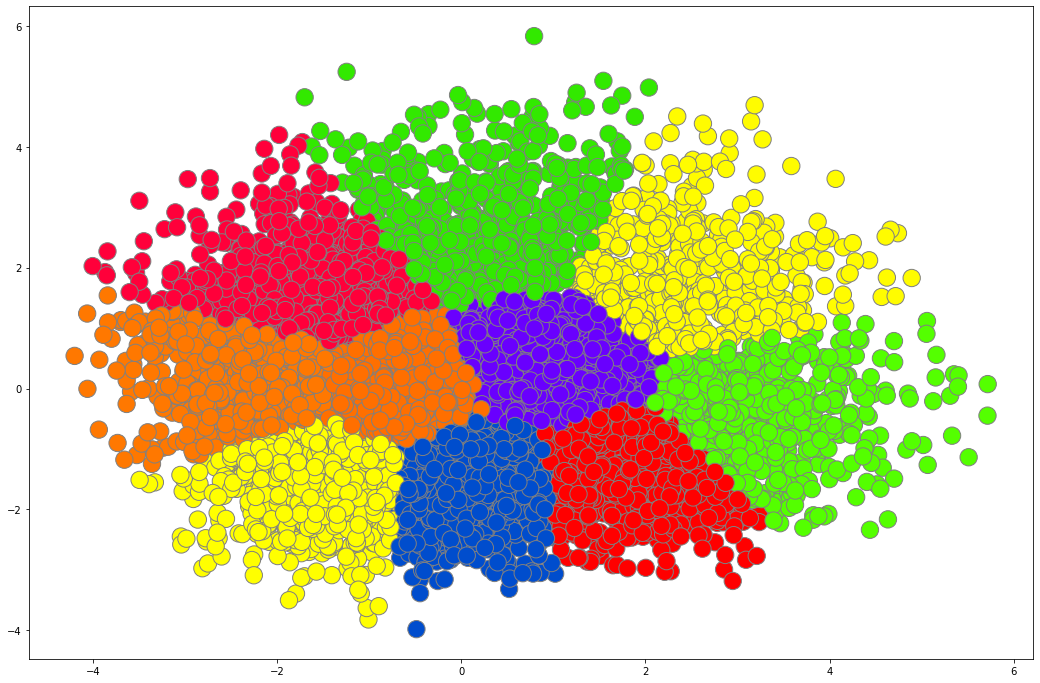

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_red = pca.fit_transform(embedding)
kmeans = KMeans(n_clusters=10, random_state=24)
y=kmeans.fit(X_red)
lab = kmeans.labels_

plt.figure(figsize=(18 ,12))
plt.scatter(X_red[:,0], X_red[:,1], c=lab, s=300, cmap="prism", edgecolor="grey")

# for i, txt in enumerate(target.index):
#     plt.annotate(txt, X_red[i],
#                  horizontalalignment='center', verticalalignment='center',
#                 )

# plt.xlabel("PCA x1")
# plt.ylabel("PCA x2")
# plt.title("PCA decomposition from DeepWalk graph embedding \n + K-means clustering")
# plt.grid()
# plt.show()	